## Waste Management sing CNN Model

In [6]:
pip install tensorflow

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [9]:
train_path = "dataset/DATASET/TRAIN"
test_path = "dataset/DATASET/TEST"

In [10]:
#Importing libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [11]:
# Visualization
x_data = []
y_data = [] 
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [01:25<00:00, 116.45it/s]


In [12]:
data.shape

(22564, 2)

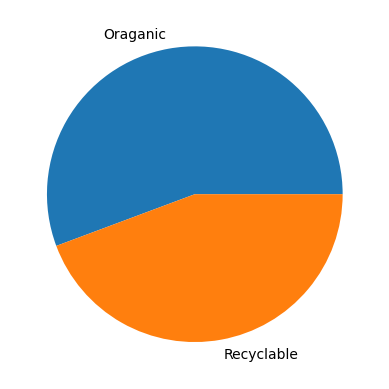

In [17]:
colors = ['#B39CD0','#FF6F61']
plt.pie(data.label.value_counts(), labels=['Oraganic','Recyclable',])
plt.show()

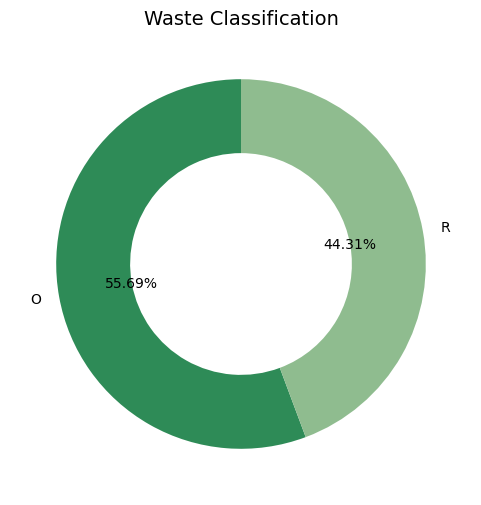

In [26]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Step 1:Paths for train and test dataset
train_path = "dataset/DATASET/TRAIN" 
test_path = "dataset/DATASET/TEST"   

# Step 2: Function to count images in each folder
def count_images(dataset_path):
    label_counts = {}
    for label_folder in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_folder)
        if os.path.isdir(label_path): 
            label_counts[label_folder] = len(os.listdir(label_path))  
    return label_counts

# Step 3: Count images for train and test
train_label_counts = count_images('dataset/DATASET/TRAIN')
test_label_counts = count_images('dataset/DATASET/TEST')

# Step 4: Combine train and test counts for visualization
combined_counts = {label: train_label_counts.get(label, 0) + test_label_counts.get(label, 0) 
                   for label in set(train_label_counts) | set(test_label_counts)}

# Step 5: Convert counts to Pandas Series
combined_counts_series = pd.Series(combined_counts)

# Step 6: Define colors
colors = ['#2E8B57','#8FBC8F','#F5DEB3'][:len(combined_counts_series)]

# Step 7: Generate the Donut Chart for Combined Data
plt.figure(figsize=(6, 6))
plt.pie(combined_counts_series, labels=combined_counts_series.index, autopct='%0.2f%%', colors=colors, startangle=90, wedgeprops={'width': 0.4})
plt.title("Waste Classification", fontsize=14)
plt.show()


